In [21]:
#The entire program was written, documented and improvised by
#Sheekar Banerjee, A.I. Research Engineer, Cisscom LLC, USA

import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/Sheekar mastering OpenCV'
data_file = os.listdir(data_dir)
#listing the file names in the folder which we are loading from google drive
data_file.sort()
data_file

['Sheekar 2.jpg', 'daniel.jpeg']

In [22]:
#loading the images
img_path_1, img_path_2 = [os.path.join(data_dir, filename) 
for filename in data_file]
print(img_path_1,'\n', img_path_2)

/content/drive/MyDrive/Sheekar mastering OpenCV/Sheekar 2.jpg 
 /content/drive/MyDrive/Sheekar mastering OpenCV/daniel.jpeg


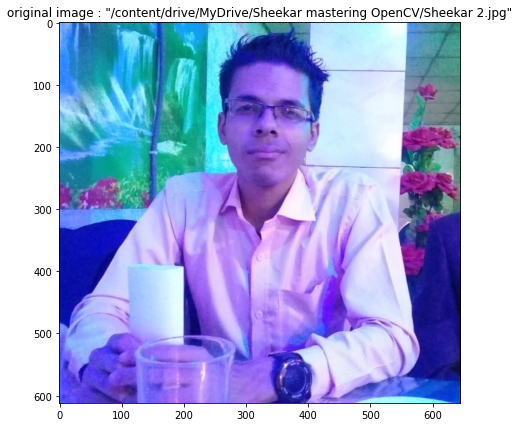

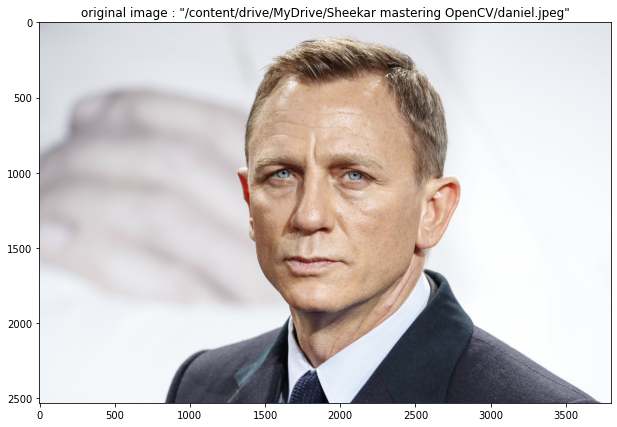

In [23]:
#Loading the original images
for img_path in [img_path_1, img_path_2]:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.figure(figsize = (12, 7))
    plt.imshow(img)
    plt.title('original image : "%s"'%(img_path))
plt.show()

In [24]:
#Defining a function to showcase the output image after plug-in pixel & channel

def fix_pixel_in_chanel_display(img_path, value, chanel=None):
    """ 
    This function converts the colored_images w.r.t various pixel_value and chanel
    Input_Args: 
        img_path (string) : path to image
        chanel (int from 0-2): coresponding to chanels {blue, green, red} of the image
        value (int from 0-255): value at each chanel input
    Return: an image which changed after plug in the parameter
    """
    ## read image
    img = cv2.imread(img_path)
    ## convert to RGB mode to show in matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    ## asgin RGB chanels to their_full_names
    chanel_names = ['"red"', '"green"', '"blue"']
    if chanel != None:
        img[:, :, chanel] = value
    ## display the images and its title
    plt.title('all_pixel(chanel = %s) = %s'%(chanel_names[chanel], value))
    plt.imshow(img)

/content/drive/MyDrive/Sheekar mastering OpenCV/Sheekar 2.jpg


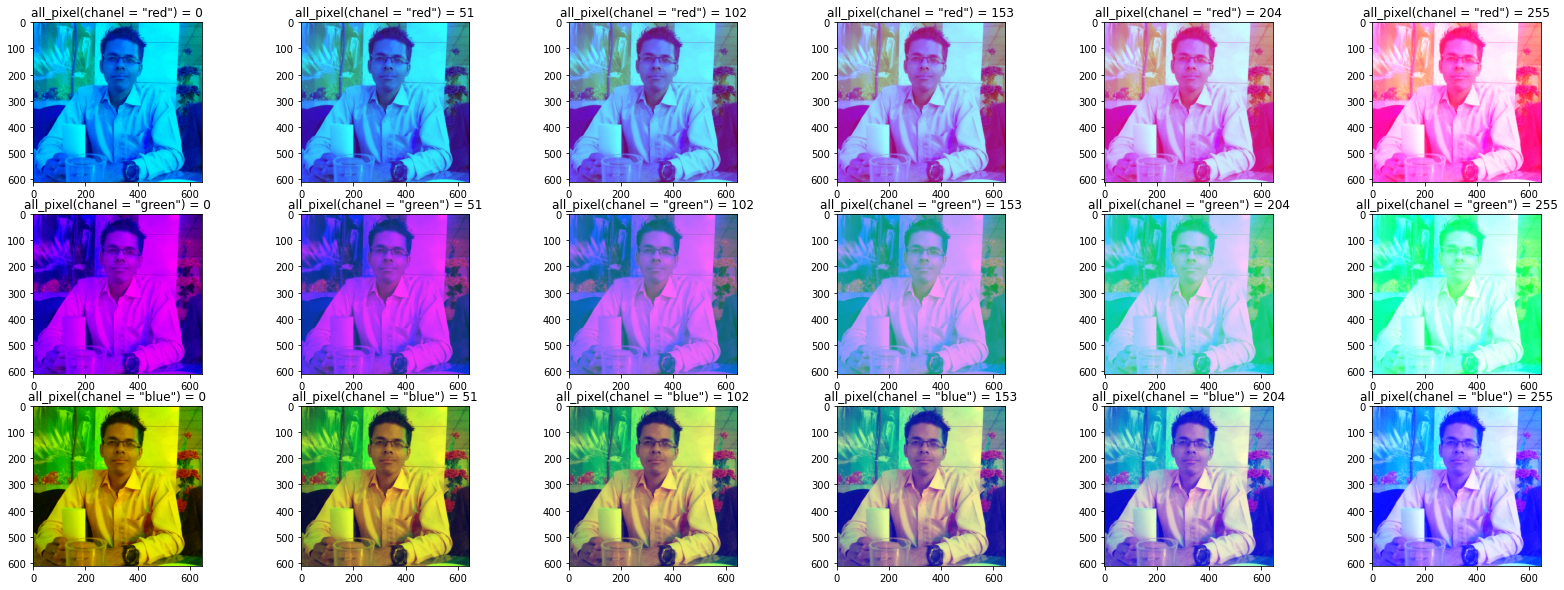

In [25]:
values = np.arange(0, 256, 51)
print(img_path_1)
plt.figure(figsize = (28, 10) )
idx = 1
for c in range(3):
    for k in range(6):
        plt.subplot(3, 6, idx)
        fix_pixel_in_chanel_display(img_path_1, values[k], c)
        idx = idx + 1

/content/drive/MyDrive/Sheekar mastering OpenCV/daniel.jpeg


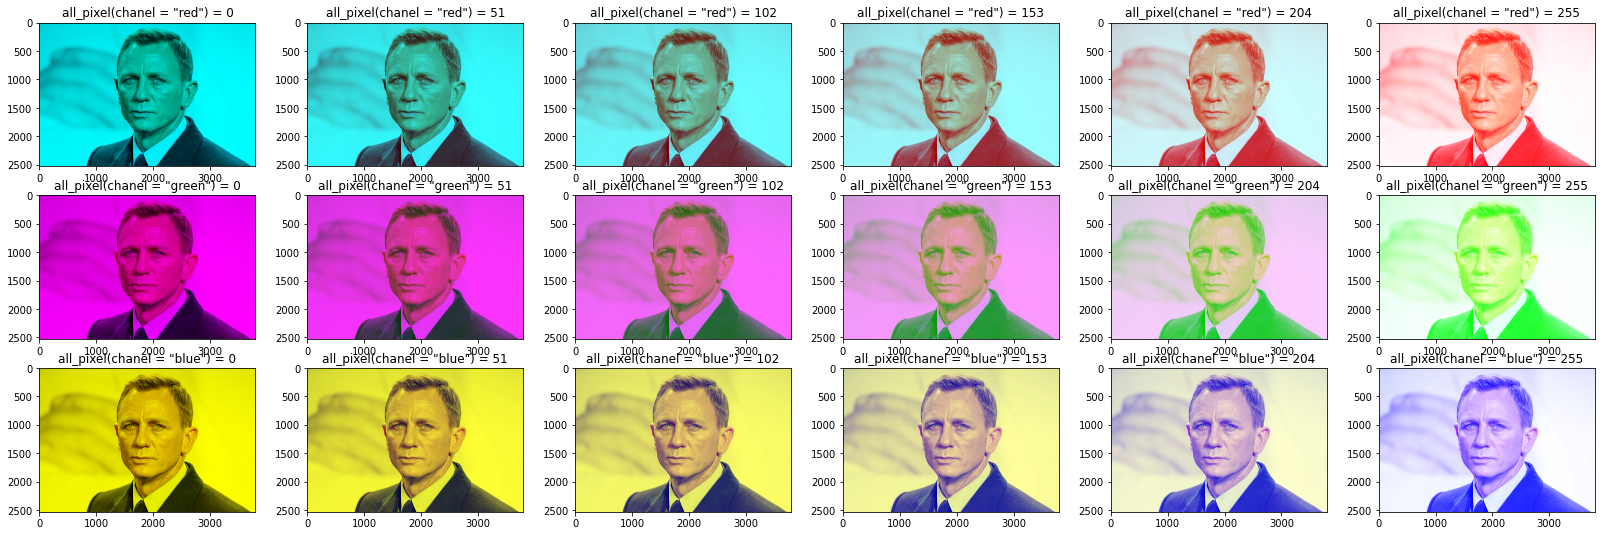

In [26]:
print(img_path_2)
plt.figure(figsize = (28, 9) )
idx = 1
for c in range(3):
    for k in range(6):
        plt.subplot(3, 6, idx)
        fix_pixel_in_chanel_display(img_path_2, values[k], c)
        idx = idx + 1

In [27]:
#Spliting the image to the sequences of various color w.r.t the height

def split_colored_wrt_height(img_path, values_range, chanel_id):
    """
    This function split an image to various colors with respect to the given chanel and corespondence pixels.
    Input args:
        img_path (string): path to the image
        values_range (list of integers): values of the pixel in each partitions of image by height
        chanel_id (int in {0,1,2}): corresponding to Red, Green and Blue
    Returns: plot of image
    """
    img = cv2.imread(img_path)
    n = len(values_range)
    h, w = img.shape[:2]
    hp = h // (len(values_range) + 1)
    img = img[:hp*(n+1), :, :]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    chanel_names = ['"red"', '"green"', '"blue"']
    
    for k in range(n):
        img[hp * (k+1): hp*(k+2), :, chanel_id] = values_range[k]
    plt.imshow(img)
    Values = ['original'] + values_range.tolist()
    vl = ['height in [%s, %s), \n all_pixel(chanel = %s) = %s'%(hp * k, hp*(k+1), chanel_names[chanel_id], Values[k]) for k in range(n+1)]
    plt.yticks([int((k+0.5)*h/(n+1)) for k in range(n+1)], vl)

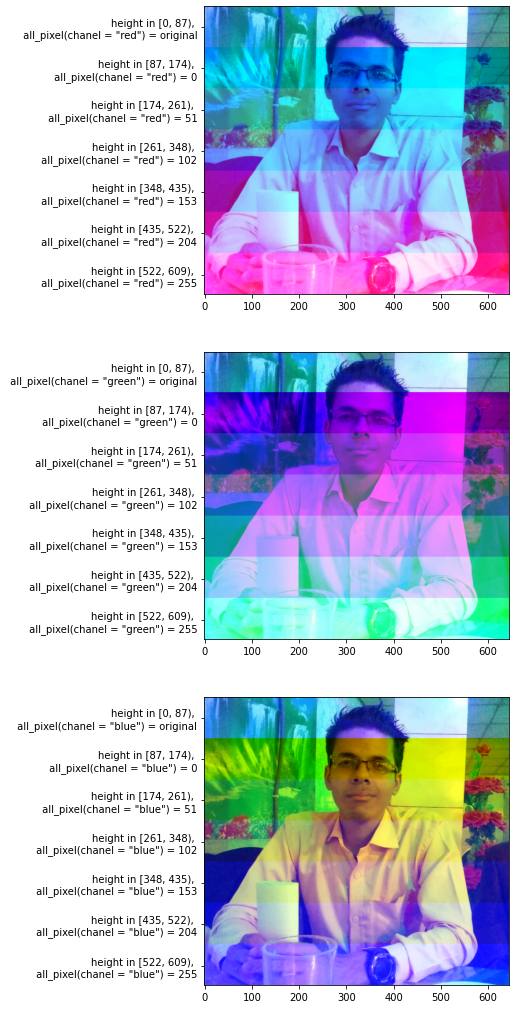

In [28]:
plt.figure(figsize = (22, 18))
for chanel in [0, 1, 2]:
    plt.subplot(3, 1, chanel + 1)
    split_colored_wrt_height(img_path_1, values, chanel)
plt.show()

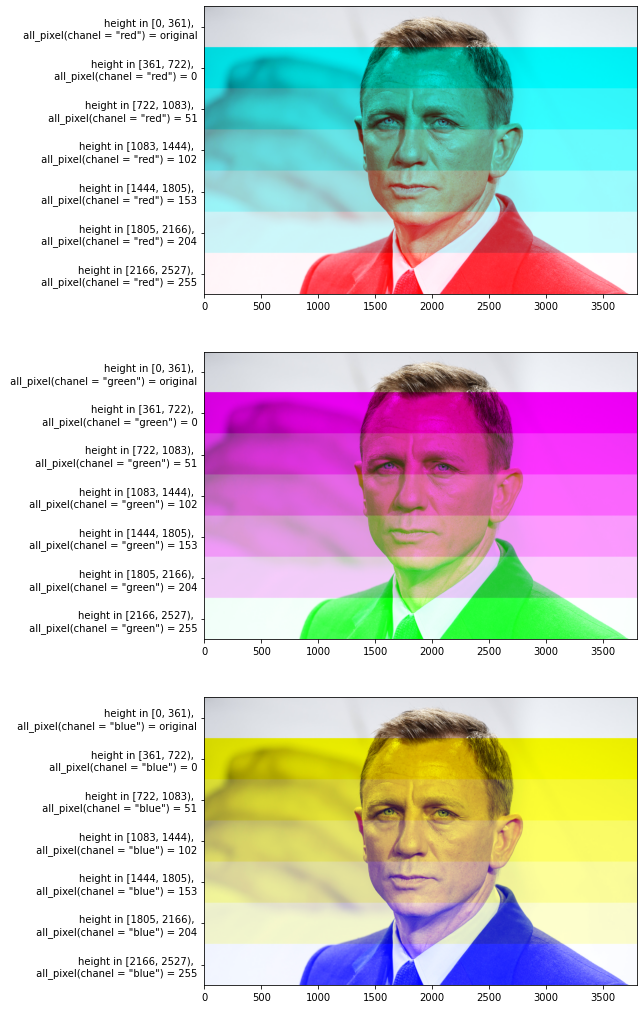

In [29]:
plt.figure(figsize = (22, 18))
for chanel in [0, 1, 2]:
    plt.subplot(3, 1, chanel + 1)
    split_colored_wrt_height(img_path_2, values, chanel)
plt.show()

In [30]:
#Spliting the image to the sequences of various color w.r.t the width

def split_colored_wrt_width(img_path, values_range, chanel_id):
    """
    This function split an image to various colors with respect to the given chanel and corespondence pixels.
    Input args:
        img_path (string): path to the image
        values_range (list of integers): values of the pixel in each partitions of image by width
        chanel_id (int in {0,1,2}): corresponding to Red, Green and Blue
    Returns: plot of image
    """
    img = cv2.imread(img_path)    
    n = len(values_range)
    h, w = img.shape[:2]
    wp = w // (n + 1)
    img = img[:, : wp*(n+1), :]
    chanel_names = ['"red"', '"green"', '"blue"']
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for k in range(n):
        img[:, wp * (k+1): wp*(k+2), chanel_id] = values_range[k]
    plt.imshow(img)
    Values = ['original'] + values_range.tolist()
    vl = ['width in [%s, %s), all_pixel(chanel = %s) = %s'%(wp * k, wp*(k+1), chanel_names[chanel_id], Values[k]) for k in range(n+1)]
    plt.xticks([int((k+0.5)*w/(n+1)) for k in range(n+1)], vl, rotation=85)

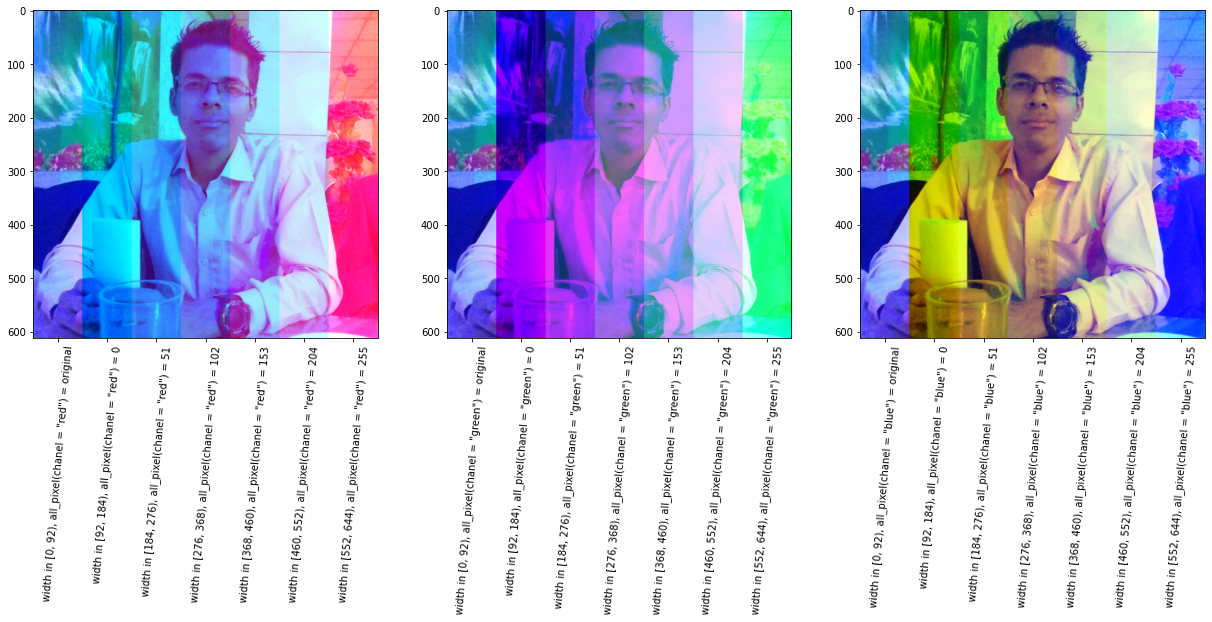

In [31]:
plt.figure(figsize = (21, 12))
for k in range(3):
    plt.subplot(1,3,k+1), split_colored_wrt_width(img_path_1, values, k)
plt.show()

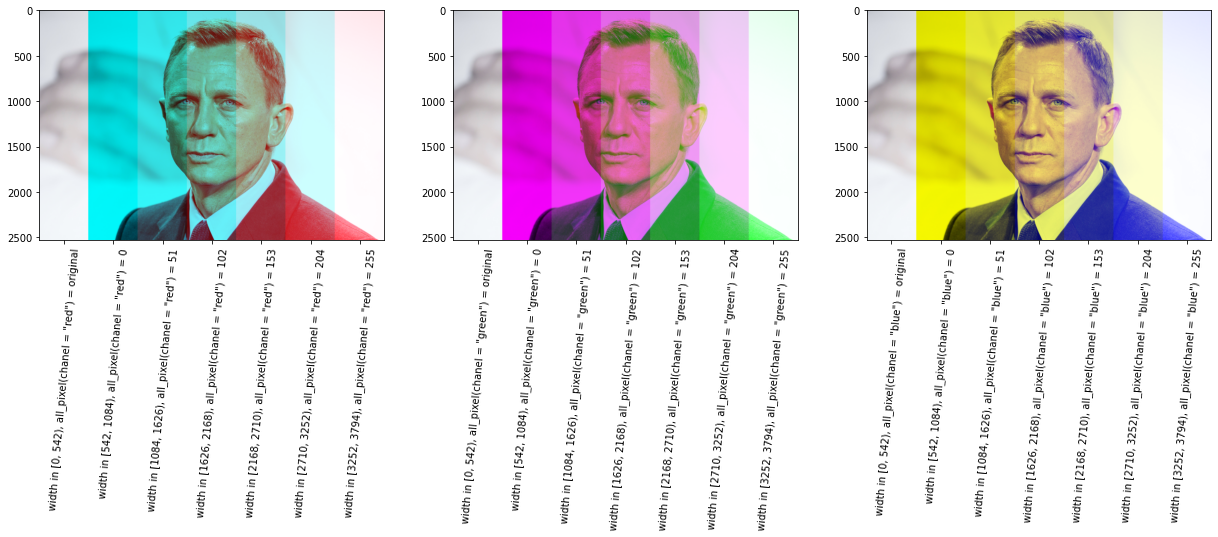

In [32]:
plt.figure(figsize = (21, 12))
for k in range(3):
    plt.subplot(1,3,k+1), split_colored_wrt_width(img_path_2, values, k)
plt.show()
